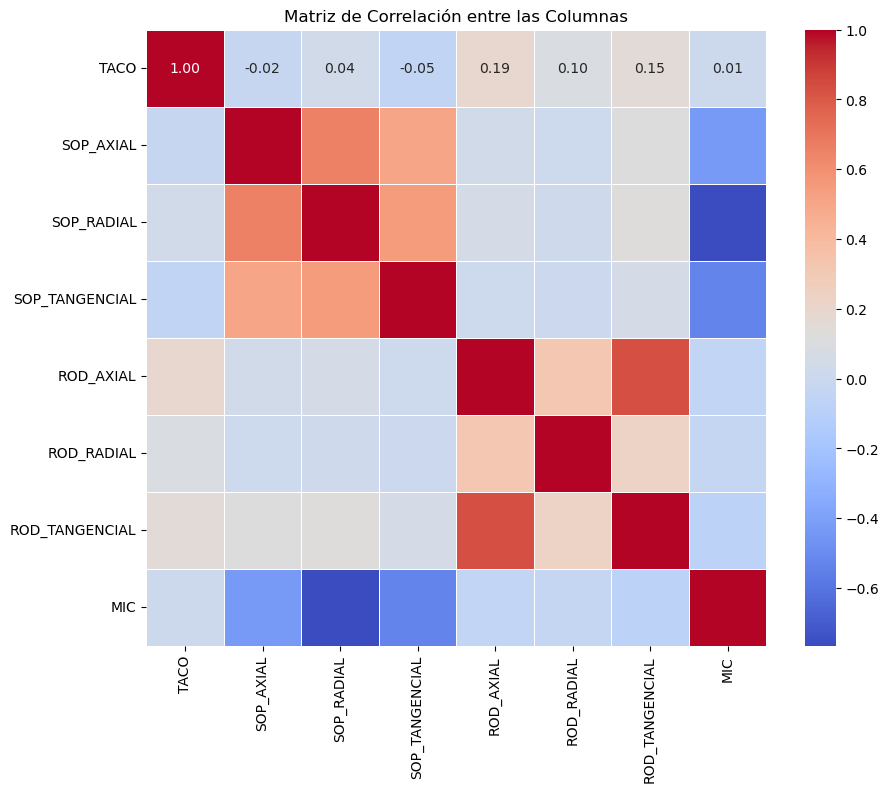

Archivos Normales:
DataFrame 1: 250000 filas
DataFrame 2: 250000 filas
DataFrame 3: 250000 filas
DataFrame 4: 250000 filas
DataFrame 5: 250000 filas
DataFrame 6: 250000 filas
DataFrame 7: 250000 filas

Archivos de Desbalance:
DataFrame 1: 250000 filas
DataFrame 2: 250000 filas
DataFrame 3: 250000 filas
DataFrame 4: 250000 filas
DataFrame 5: 250000 filas
DataFrame 6: 250000 filas
DataFrame 7: 250000 filas


<Figure size 1200x1000 with 0 Axes>

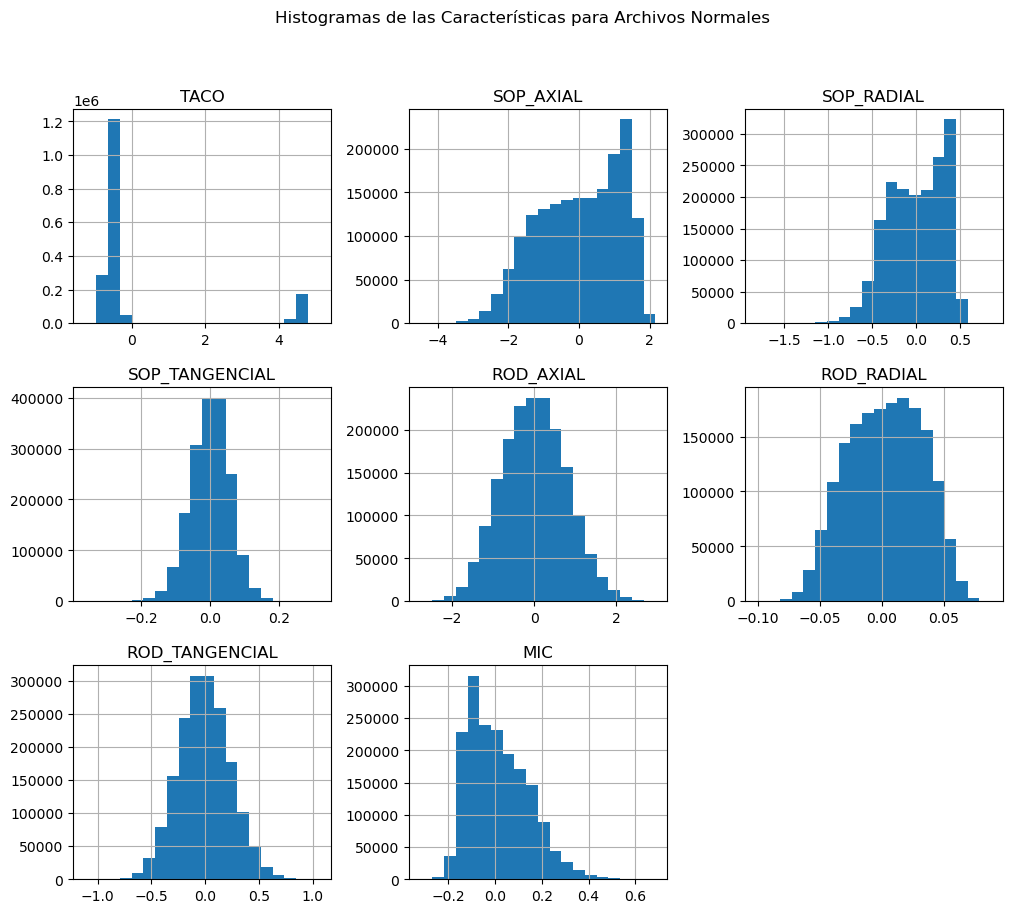

<Figure size 1200x1000 with 0 Axes>

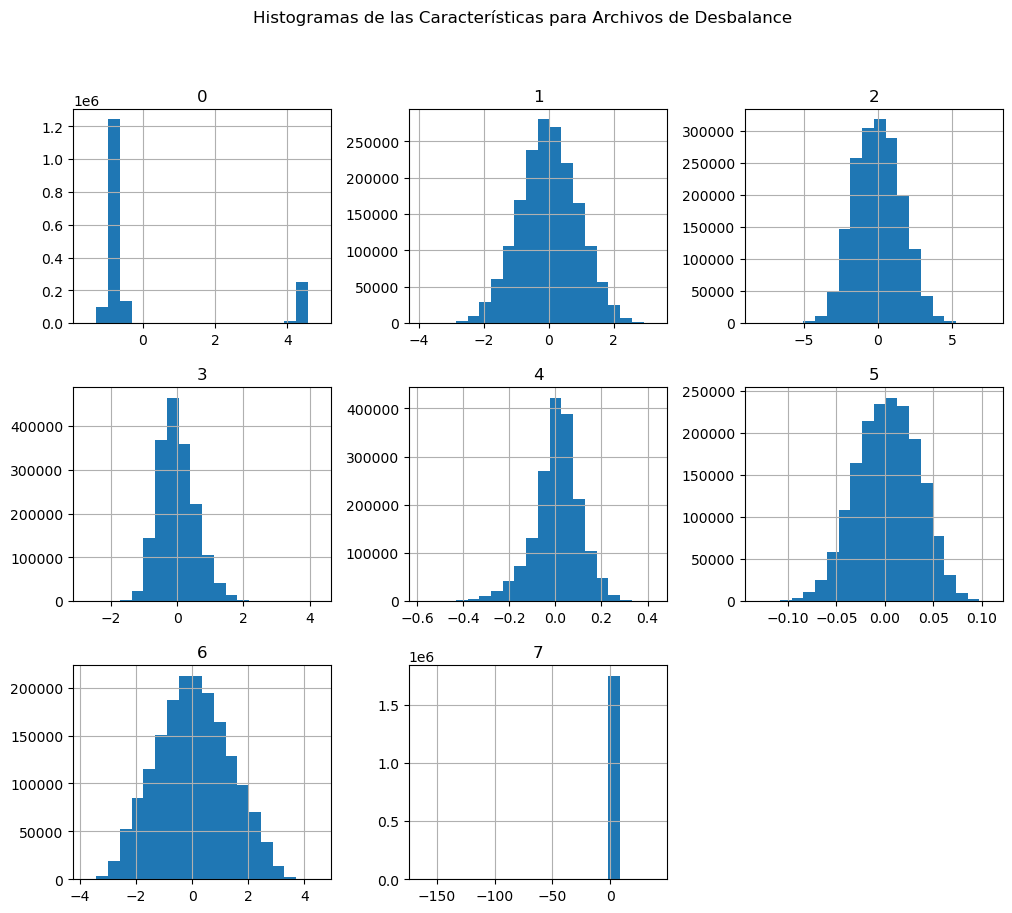

<Figure size 1200x800 with 0 Axes>

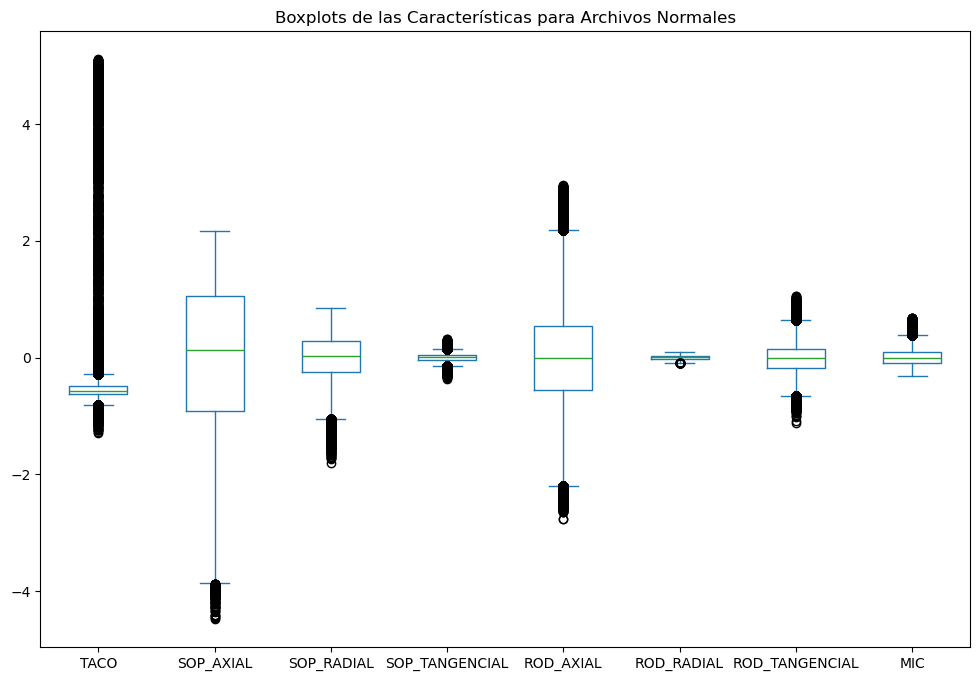

<Figure size 1200x800 with 0 Axes>

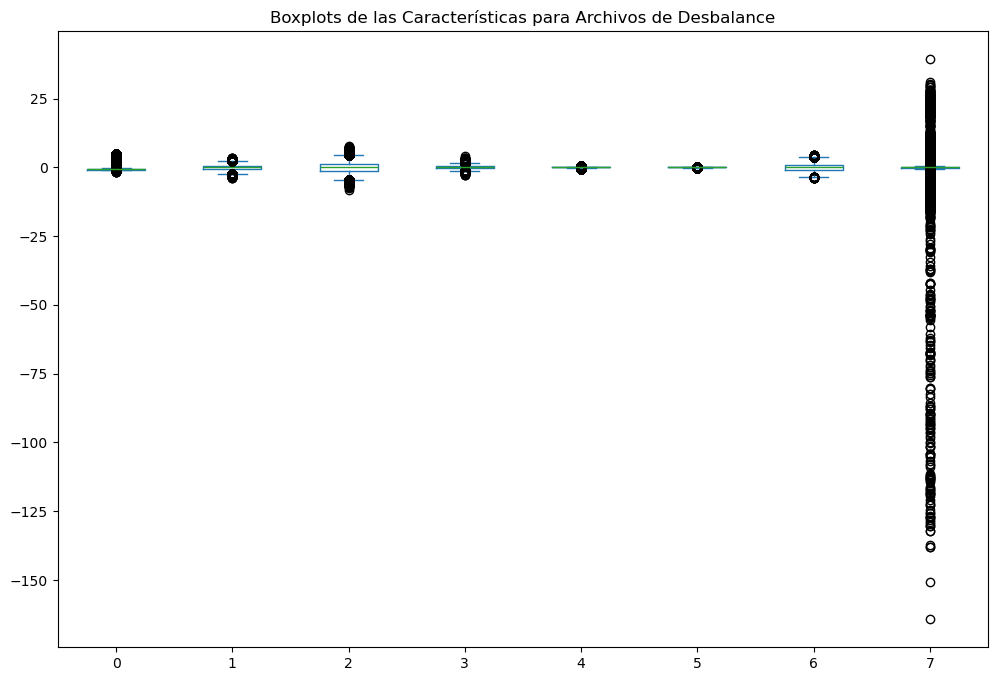

La columna 'MIC' no está presente en df_desbalances.
Columnas de df_normales después de eliminar 'MIC':
Index(['TACO', 'SOP_AXIAL', 'SOP_RADIAL', 'SOP_TANGENCIAL', 'ROD_AXIAL',
       'ROD_RADIAL', 'ROD_TANGENCIAL'],
      dtype='object')

Columnas de df_desbalances después de eliminar 'MIC':
Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')


In [ ]:


# Librerías utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba

# Importar algoritmos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler     # Para estandarizar los datos
from sklearn.metrics import confusion_matrix, classification_report  # Métricas de evaluación de modelos

# Cargar datos de archivos normales
ruta_normales = r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\NORMAL'
archivos_normales = os.listdir(ruta_normales)
archivos_seleccionados_normales = archivos_normales[:7]

# Crear DataFrames a partir de los archivos normales
dfs_normales = []
for archivo in archivos_seleccionados_normales:
    ruta_archivo = os.path.join(ruta_normales, archivo)
    df = pd.read_csv(ruta_archivo, header=None)
    dfs_normales.append(df)
df_normales = pd.concat(dfs_normales, ignore_index=True)

# Cargar datos de archivos de desbalances
rutas_desbalances = [
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\6 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\10 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\15 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\20 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\25 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\30 GRAMOS',
    r'C:\Users\Usuario\Desktop\TECNICATURA\APRENDIZAJE AUTOMATICO\PROYECTO FALLAS\PROYECTO-DETECCION-DE-FALLA\cookiecutter-data-science\datos\DESBALANCES\35 GRAMOS'
]
dfs_desbalances = []
for ruta_carpeta_desbalance in rutas_desbalances:
    archivos_desbalance = os.listdir(ruta_carpeta_desbalance)
    if archivos_desbalance:
        archivo_seleccionado = archivos_desbalance[0]
        ruta_archivo = os.path.join(ruta_carpeta_desbalance, archivo_seleccionado)
        df = pd.read_csv(ruta_archivo, header=None)
        dfs_desbalances.append(df)
df_desbalances = pd.concat(dfs_desbalances, ignore_index=True)

# Asignar nombres a las columnas según la especificación dada
df_normales.columns = ['TACO', 'SOP_AXIAL', 'SOP_RADIAL', 'SOP_TANGENCIAL', 'ROD_AXIAL', 'ROD_RADIAL', 'ROD_TANGENCIAL', 'MIC']

# Visualización de la matriz de correlación
matriz_correlacion = df_normales.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre las Columnas')
plt.show()

# Contar el número de muestras en cada DataFrame
print("Archivos Normales:")
for i, df_normal in enumerate(dfs_normales, 1):
    print(f"DataFrame {i}: {df_normal.shape[0]} filas")

print("\nArchivos de Desbalance:")
for i, df_desbalance in enumerate(dfs_desbalances, 1):
    print(f"DataFrame {i}: {df_desbalance.shape[0]} filas")

# Histogramas para archivos normales
plt.figure(figsize=(12, 10))
df_normales.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogramas de las Características para Archivos Normales')
plt.show()

# Histogramas para archivos de desbalance
plt.figure(figsize=(12, 10))
df_desbalances.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogramas de las Características para Archivos de Desbalance')
plt.show()

# Boxplots para archivos normales
plt.figure(figsize=(12, 8))
df_normales.plot(kind='box', figsize=(12, 8))
plt.title('Boxplots de las Características para Archivos Normales')
plt.show()

# Boxplots para archivos de desbalance
plt.figure(figsize=(12, 8))
df_desbalances.plot(kind='box', figsize=(12, 8))
plt.title('Boxplots de las Características para Archivos de Desbalance')
plt.show()

# Eliminar la columna 'MIC' si existe
if 'MIC' in df_normales.columns:
    df_normales.drop(columns=['MIC'], inplace=True)
else:
    print("La columna 'MIC' no está presente en df_normales.")

if 'MIC' in df_desbalances.columns:
    df_desbalances.drop(columns=['MIC'], inplace=True)
else:
    print("La columna 'MIC' no está presente en df_desbalances.")

# Imprimir las columnas actuales
print("Columnas de df_normales después de eliminar 'MIC':")
print(df_normales.columns)

print("\nColumnas de df_desbalances después de eliminar 'MIC':")
print(df_desbalances.columns)

# Comparación de histogramas entre Normal y Desbalance
plt.figure(figsize=(12, 8))
n_cols = 4
n_rows = (df_normales.shape[1] // n_cols) + 1
for i, col in enumerate(df_normales.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df_normales[col], bins=20, alpha=0.7, color='blue', label='Normal')
    plt.hist(df_desbalances[col], bins=20, alpha=0.7, color='red', label='Desbalance')
    plt.title(f'Histograma - {col}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.legend()
plt.tight_layout()
plt.show()

# Verificar valores faltantes
print("Valores faltantes en df_normales:")
print(df_normales.isnull().sum())

print("\nValores faltantes en df_desbalances:")
print(df_desbalances.isnull().sum())

# Usar boxplots para identificar valores atípicos
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_normales)
plt.title("Boxplot - Archivos Normales")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_desbalances)
plt.title("Boxplot - Archivos de Desbalances")

plt.tight_layout()
plt.show()

# Etiquetar datos
df_normales['Etiqueta'] = 0
df_desbalances['Etiqueta'] = 1

# Verificar las etiquetas
print("Datos normales con etiquetas:")
print(df_normales.head())

print("\nDatos de desbalance con etiquetas:")
print(df_desbalances.head())

# Dividir datos en entrenamiento y prueba
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    df_normales.drop(columns=['Etiqueta']),
    df_normales['Etiqueta'],
    test_size=0.25,
    random_state=42
)

X_train_desbalance, X_test_desbalance, y_train_desbalance, y_test_desbalance = train_test_split(
    df_desbalances.drop(columns=['Etiqueta']),
    df_desbalances['Etiqueta'],
    test_size=0.25,
    random_state=42
)

